Enter size of board: 16
Solution: [8, 1, 11, 15, 3, 6, 9, 13, 4, 0, 14, 5, 2, 10, 12, 7]
Collisions: []
fitness: 16
final iterstion: 24
total time for solution is 0:00:00.838464


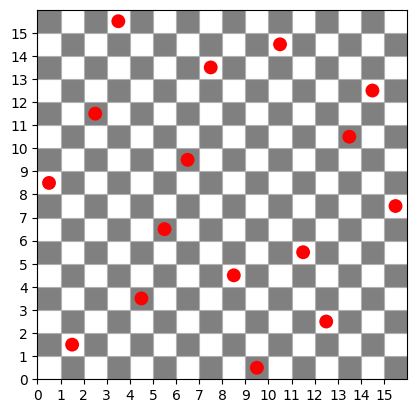

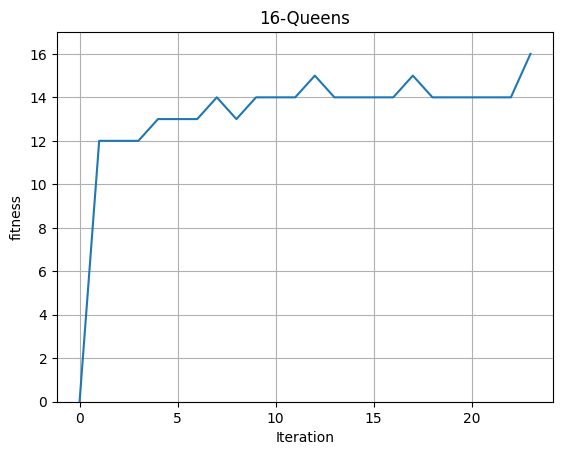

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime

def fitness(individual):
    board_size = len(individual)
    horizontal_collisions = sum(individual.count(queen) - 1 for queen in individual) // 2
    diagonal_collisions = sum(1 for i in range(board_size) for j in range(i + 1, board_size) if abs(j - i) == abs(individual[j] - individual[i]))
    return max(0, len(individual) - (horizontal_collisions + diagonal_collisions))

def find_collision(individual):
    collisions = []
    n = len(individual)
    for i in range(n):
        for j in range(i + 1, n):
            if individual[i] == individual[j] or abs(individual[i] - individual[j]) == abs(i - j):
                collisions.append((i, j))
    return collisions

def create_individual(n):
    return [random.randint(0, n - 1) for _ in range(n)]

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point]
    child2 = parent2[:crossover_point]

    for value in parent2[crossover_point:]:
        if value not in child1:
            child1.append(value)

    for value in parent2[:crossover_point]:
        if value not in child1:
            child1.append(value)

    for value in parent1[crossover_point:]:
        if value not in child2:
            child2.append(value)

    for value in parent1[:crossover_point]:
        if value not in child2:
            child2.append(value)

    return child1, child2

def mutate(individual):
    p, q = random.randint(0, len(individual) - 1), random.randint(0, len(individual) - 1)
    individual[p], individual[q] = individual[q], individual[p]
    return individual

def selection(population, fitnesses, k=3):
    selected_indices = random.sample(range(len(population)), k)
    selected_fitnesses = [fitnesses[i] for i in selected_indices]
    best_index = selected_indices[selected_fitnesses.index(max(selected_fitnesses))]
    return population[best_index]

def visualize_solution(solution):
    n = len(solution)
    fig, ax = plt.subplots()

    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                color = 'white'
            else:
                color = 'gray'
            ax.add_patch(patches.Rectangle((i, j), 1, 1, facecolor=color))

    for i, j in enumerate(solution):
        ax.add_patch(patches.Circle((i + 0.5, j + 0.5), 0.3, facecolor='red'))

    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels([str(i) for i in range(n)])
    ax.set_yticklabels([str(i) for i in range(n)])
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    plt.grid(True)
    plt.show()

def n_queens_genetic_algorithm(board_size, population_size=500, generations=300, crossover_prob=0.8, mutation_prob=0.2):
    population = [create_individual(board_size) for _ in range(population_size)]
    fitnesses = [fitness(individual) for individual in population]

    cost_list = []
    iteration_count = 0

    # sorting Population with fitness key
    population.sort(key=lambda ind: fitness(ind))
    best_individual = population[0]
    best_fitness = fitness(best_individual)
    cost_list.append(best_fitness)

    while best_fitness != board_size and iteration_count < generations:
        new_population = []

        for _ in range(population_size // 2):
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)

            if random.random() < crossover_prob:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2

            if random.random() < mutation_prob:
                child1 = mutate(child1)

            if random.random() < mutation_prob:
                child2 = mutate(child2)

            new_population.append(child1)
            new_population.append(child2)

        population = new_population
        fitnesses = [fitness(individual) for individual in population]

        best_individual = population[fitnesses.index(max(fitnesses))]
        best_fitness = max(fitnesses)

        cost_list.append(best_fitness)
        iteration_count += 1

    return best_individual, find_collision(best_individual), cost_list

board_size = int(input("Enter size of board: "))
start_time = datetime.now()
best_individual, collisions, cost_list = n_queens_genetic_algorithm(board_size)
end_time = datetime.now()

print("Solution:", best_individual)
print("Collisions:", collisions)
print("fitness:", fitness(best_individual))
print("final iterstion:",len(cost_list))
print("total time for solution is %s" % (str(end_time - start_time)))

visualize_solution(best_individual)

iteration = range(len(cost_list))
plt.plot(iteration, cost_list)
plt.grid(True)
if len(cost_list) > 0:
    plt.ylim((0, max(cost_list) + 1))
    plt.ylabel('fitness')
    plt.xlabel('Iteration')
    plt.title(str(board_size) + "-Queens")
    plt.show()